In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv'  
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
DATA_TEST_PATH = '../data/test.csv' 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

## Do your thing crazy machine learning thing here :) ...

In [3]:
from proj1_utils import *
from proj1_visualization import *
from proj1_cross_validation import *
from implementations import *

### Explore the data

In [4]:
cat_cols = [22]           # PRI_jet_num: the only categorical column
tX_num, tX_cat = split_numerical_categorical(tX,cat_cols)

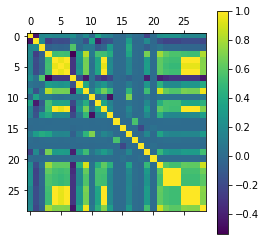

In [5]:
plt.matshow(np.corrcoef(tX_num,rowvar=False))
plt.colorbar()

In [6]:
np.corrcoef(tX_num[:,22:25],rowvar = False)

array([[1.        , 0.99610001, 0.9960998 ],
       [0.99610001, 1.        , 0.99999184],
       [0.9960998 , 0.99999184, 1.        ]])

In [7]:
np.corrcoef(tX_num[:,25:28],rowvar = False)

array([[1.        , 0.99935235, 0.99935185],
       [0.99935235, 1.        , 0.99999477],
       [0.99935185, 0.99999477, 1.        ]])

In [8]:
corr_cols = [4,6,25,26,23,24]
tX_num_uncorr = np.delete(tX_num,corr_cols,axis = 1)

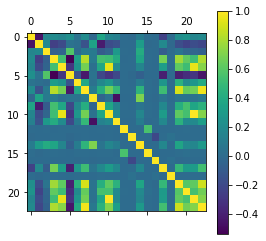

In [9]:
plt.matshow(np.corrcoef(tX_num_uncorr,rowvar=False))
plt.colorbar()

In [10]:
tX_test_num, tX_test_cat = split_numerical_categorical(tX_test,cat_cols)

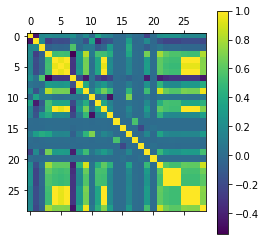

In [11]:
plt.matshow(np.corrcoef(tX_test_num,rowvar=False))
plt.colorbar()

In [12]:
tX_test_num_uncorr = np.delete(tX_test_num,corr_cols,axis = 1)

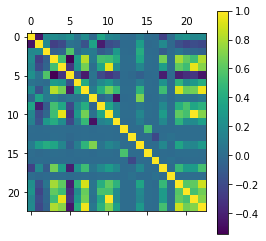

In [13]:
plt.matshow(np.corrcoef(tX_test_num_uncorr,rowvar=False))
plt.colorbar()

## Preprocessing

In [14]:
# Treat numerical values
best_degree = 17
full_x_train_num_nan = replace_undef_val_with_nan(tX_num_uncorr)
full_x_train_num_std, train_mean, train_std = nan_standardize_fit(full_x_train_num_nan)
# full_x_train_num_valid_std = replace_nan_val_with_mean(full_x_train_num_nan_std)
full_x_train_num_valid = replace_nan_val_with_median(full_x_train_num_std)
full_x_train_num_valid = replace_iqr_outliers(full_x_train_num_valid)
# Treat categorical values
full_x_train_ohe_cat = one_hot_encode(tX_cat)
full_x_train_poly = build_poly(full_x_train_num_valid , best_degree)
full_x_train = np.hstack((full_x_train_poly,full_x_train_ohe_cat))
# Treat labels
full_y_train = y
# full_y_train = relabel_y_non_negative(y).reshape(-1,1)

In [15]:
x_train, y_train, x_val, y_val = split_data(full_x_train,full_y_train,0.8)

In [17]:
# Treat numerical values
x_test_num_nan = replace_undef_val_with_nan(tX_test_num_uncorr)
x_test_num_nan_std = nan_standardize_transform(x_test_num_nan,train_mean,train_std)
# x_test_num_nan_std = nan_standardize_with_median_transform(x_test_num_nan,train_median,train_std)
x_test_num_valid_std = replace_nan_val_with_median(x_test_num_nan_std)
x_test_num_valid_std = replace_iqr_outliers(x_test_num_valid_std)
# x_test_num_valid_std = replace_nan_val_with_mean(x_test_num_nan_std)
x_test_ohe_cat = one_hot_encode(tX_test_cat)
x_test_poly = build_poly(x_test_num_valid_std , best_degree)
x_test = np.hstack((x_test_poly,x_test_ohe_cat))

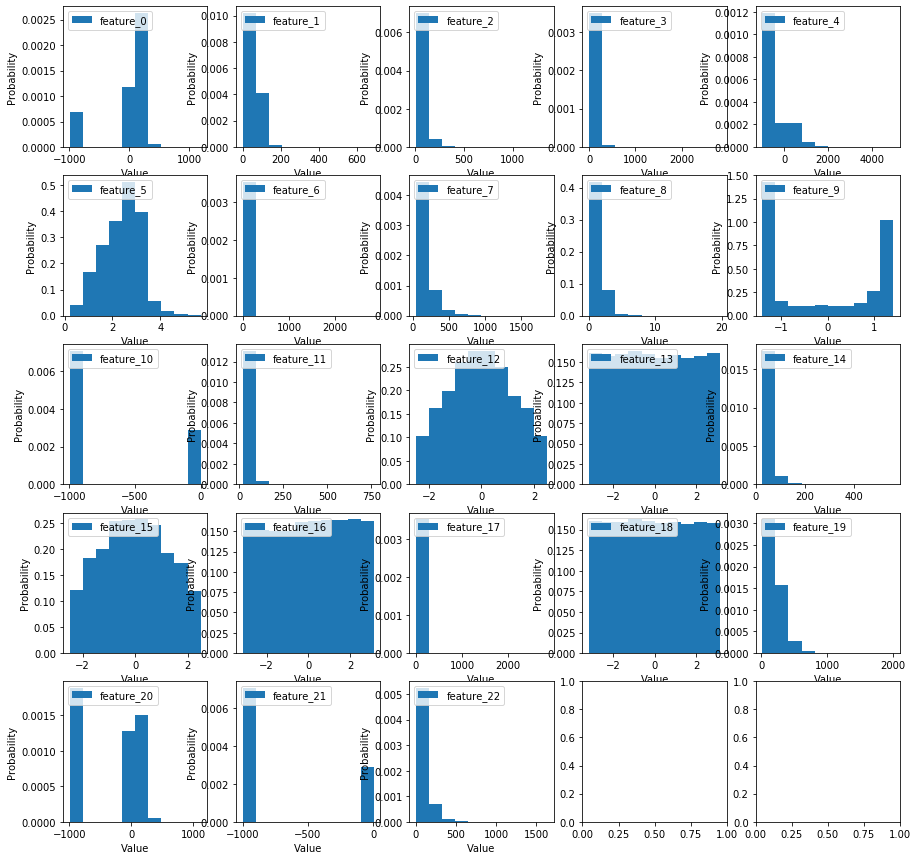

In [18]:
multiHistPlots(tX_num_uncorr)

## Explore feature 12: Det_met_phi_centrality

## Ridge regression

In [20]:
# lambdas = np.logspace(-10, 0, 20)
# k_fold = 4 
# seed = 7
# best_lambda, lambda_rmse_tr, lambda_rmse_te = cross_validation_ridge_reg_best_lambda(y_train, x_train, lambdas, k_fold, seed)

In [21]:
# best degree 17 already found
# lambdas = [0.0000001]
# degrees = np.arange(1,20)
# seed = 7
# best_degree, best_lambda, deg_lambda_rmse_tr, deg_lambda_rmse_te = cross_validation_ridge_reg_best_degree_best_lambda(y_train, x_train, degrees, lambdas, k_fold, seed)

KeyboardInterrupt: 

In [22]:
# plt.plot(degrees,deg_lambda_rmse_tr,label = 'train error')
# plt.plot(degrees,deg_lambda_rmse_te,label = 'test error')
# plt.grid()
# plt.legend(loc = 2)
# plt.show()

NameError: name 'deg_lambda_rmse_tr' is not defined

In [ ]:
# print(best_degree)
# print(best_lambda)

In [ ]:
# plt.semilogx(lambdas,lambda_rmse_tr,label = 'train error')
# plt.semilogx(lambdas,lambda_rmse_te,label = 'test error')
# # plt.plot(lambdas,rmse_tr,label = 'train error')
# # plt.plot(lambdas,rmse_te,label = 'test error')
# plt.grid()
# plt.legend(loc = 2)
# plt.show()

In [ ]:
# print(best_lambda)

In [23]:
best_lambda = 0.0000001
lambda_ = best_lambda
# x_train = np.hstack((np.ones((tX.shape[0],1)),tX))
# x_test = np.hstack((np.ones((tX_test.shape[0],1)),tX_test))
weights, loss = ridge_regression(y_train,x_train,lambda_)
# weights = ridge_regression(y.reshape(-1,1),x_train,lambda_)

## Least squares

In [ ]:
# weights = least_squares(y_train,x_train)

## Generate predictions and save ouput in csv format for submission:

In [24]:
y_pred = predict_labels(weights, x_val)
y_val = relabel_y_negative(y_val)

In [25]:
# Just to check
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, recall_score, precision_score
print(confusion_matrix(y_val,y_pred))
print(accuracy_score(y_val,y_pred))
print(f1_score(y_val,y_pred))
print(recall_score(y_val,y_pred))
print(precision_score(y_val,y_pred))

[[29035  3735]
 [ 5655 11575]]
0.8122
0.7114320835894283
0.671793383633198
0.756041802743305


In [26]:
get_label_y_counts(y_pred)

(array([-1.,  1.]), array([34690, 15310]))

In [ ]:
OUTPUT_PATH = '../output_submission/submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, x_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)